In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fbprophet import Prophet
from sklearn.metrics import r2_score
plt.style.use("ggplot")

In [2]:
d1= pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
d2= pd.read_csv("CONVENIENT_global_deaths.csv")

In [3]:
#Creating a dataframe of country and cases
world=pd.DataFrame({'Country':[], "Cases":[]})
#Assigning country names from d1 dataframe to the Country column of world dataframe
world['Country']=d1.iloc[:,1:].columns
#Finding the total number of cases per each country and assigning it to Cases column of world dataframe
cases=[]
for i in world['Country']:
    cases.append(pd.to_numeric(d1[i][1:]).sum())
world['Cases']=cases  
#Taking country list and removing . and brackets
country_list=list(world['Country'].values)
idx=0
for i in country_list:
    sayac=0
    for j in i:
        if j=='.':
            i=i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i=i[:sayac-1]
            country_list[idx]=i
            
        else:
            sayac+=1
    idx+=1
#Groupiing by country name and finding total number of cases for each country and assigning it to dataframe
world['Country']=country_list
world=world.groupby("Country")["Cases"].sum().reset_index()
world=pd.DataFrame(world)
world

,Country,Cases
0,Afghanistan,154487.0
1,Albania,162953.0
2,Algeria,201600.0
3,Andorra,15124.0
4,Angola,52307.0
...,...,...
189,Vietnam,687063.0
190,West Bank and Gaza,384390.0
191,Yemen,8667.0
192,Zambia,208469.0


In [4]:
continent=pd.read_csv("continents2.csv")
continent['name']=continent['name'].str.upper()

# Visualizing worldwide spread of Corona cases

In [7]:
world["Cases Range"]=pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000,40000000],labels=["U50K","50Kto200K","200Kto800K","800Kto1.5M","1.5Mto4M","4M+"])
alpha =[]
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES" 
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha

fig = px.choropleth(world.dropna(),
                   locations="Alpha3",
                   color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["white","khaki","yellow","orange","red","brown"])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Daily cases all around the world

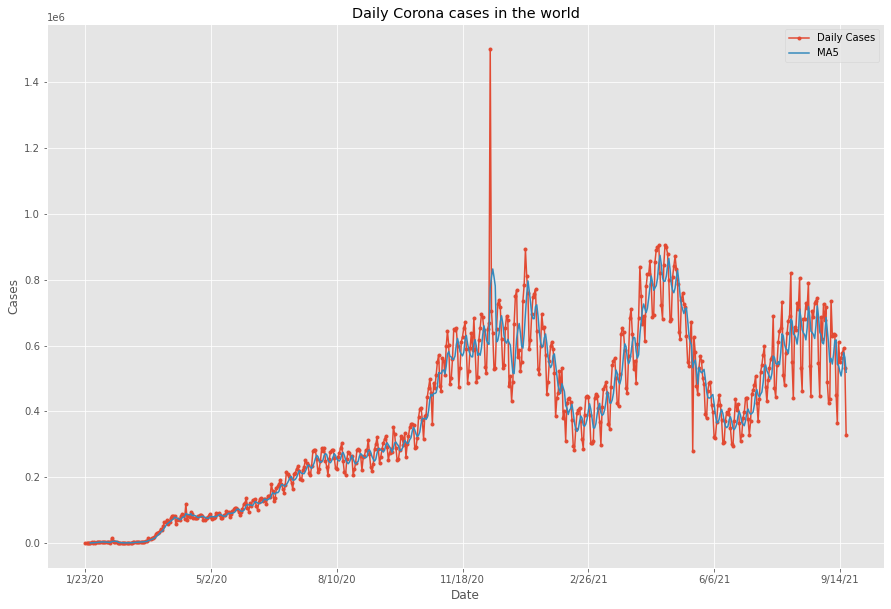

In [6]:
count=[]
for i in range(1, len(d1)):
    count.append(sum(pd.to_numeric(d1.iloc[i, 1:].values)))
d3=pd.DataFrame()
d3["Date"]=d1["Country/Region"][1:]
d3['Cases']=count
d3=d3.set_index('Date')
count1=[]
for i in range(1,len(d1)):
    count1.append(sum(pd.to_numeric(d2.iloc[i,1:].values)))
d3["Deaths"]=count1
d3['Cases'].plot(title="Daily Corona cases in the world",marker=".",figsize=(15,10),label='Daily Cases')

d3["Cases"].rolling(window=5).mean().plot(figsize=(15,10), label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()
                  

# Daily death cases of Covid 19

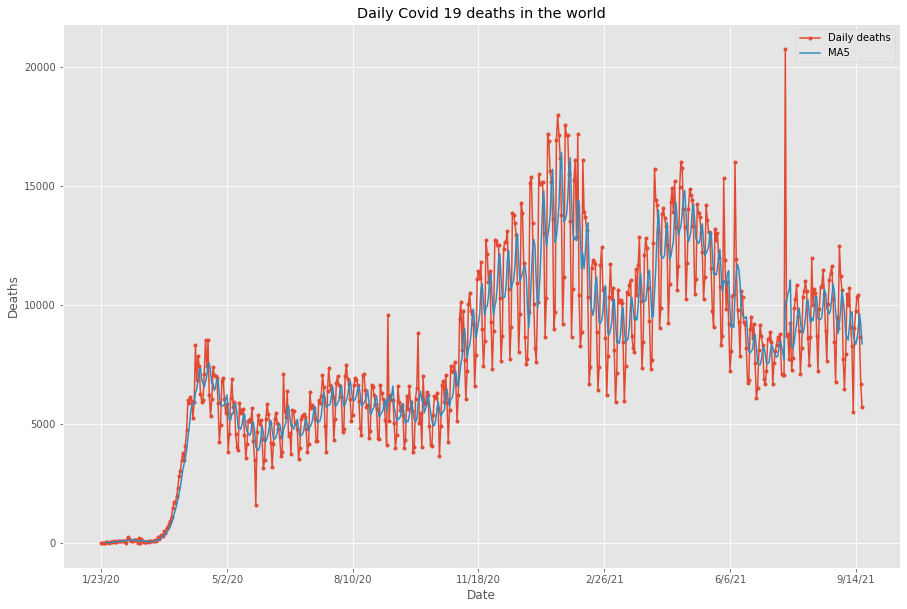

In [10]:
d3['Deaths'].plot(title="Daily Covid 19 deaths in the world", marker=".", figsize=(15,10),label="Daily deaths")
d3['Deaths'].rolling(window=5).mean().plot(figsize=(15,10), label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()